In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load the dataset
df = pd.read_csv(r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\cleanusa.csv")

# Taking 200 samples from the dataset
df = df.sample(n=200, random_state=42)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
2186,80431.036,5.475,6,4,34615.598,1300479.133
4457,62654.359,5.675,6,4,36718.512,1053484.869
2651,66300.582,6.114,5,4,31581.839,1009769.078
2104,65013.212,7.321,7,3,23039.889,1131040.702
4740,67794.295,8.105,6,2,25903.809,1343394.634


In [45]:

# Separate input and output data
X = df.drop('Price', axis=1).values
y = df['Price'].values

# Define the number of input features and the learning rate
n_features = X.shape[1]
mu = 0.001


In [46]:
# Standardize the data using the mean and standard deviation.

X = (X - X.mean()) / X.std()

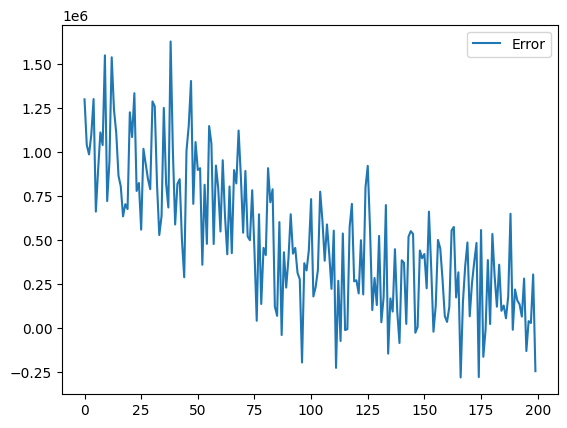

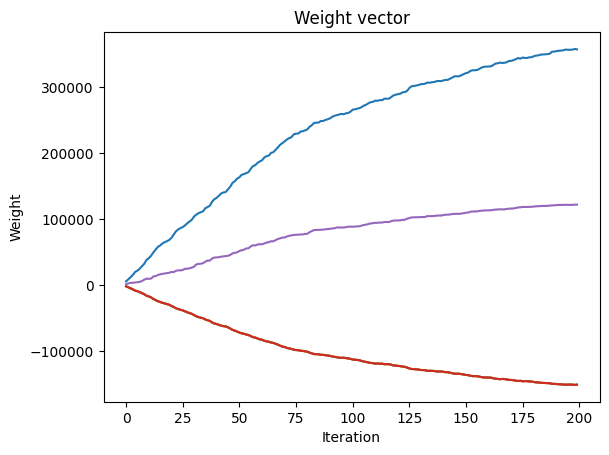

In [47]:

# Initialize the weight vector
w = np.zeros(n_features)

error_data = []
weight_data = []
# Run the Widrow-Hoff µ-LMS algorithm
for i in range(X.shape[0]):
    # Calculate the prediction and the error
    y_pred = np.dot(X[i], w)
    error = y[i] - y_pred
    error_data.append(error)
    # Update the weight vector
    w = w +  (2 * mu * error * X[i])
    weight_data.append(w)

# print the error
sns.lineplot(x=range(len(error_data)), y=error_data,label="Error")

plt.show()

# Plottin the weight vector using numpy.ndarrays

weight_data = np.array(weight_data)
for i in range(weight_data.shape[1]):
    sns.lineplot(x=range(weight_data.shape[0]), y=weight_data[:, i])
    plt.title("Weight vector")
    plt.xlabel("Iteration")
    plt.ylabel("Weight")